# Prepare a model for glass classification using KNN

**Data Description:**

* RI : refractive index

* Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

* Mg: Magnesium

* AI: Aluminum

* Si: Silicon

* K:Potassium

* Ca: Calcium

* Ba: Barium

* Fe: Iron

**Type: Type of glass: (class attribute)**

 * 1 -- building_windows_float_processed*
 
 * 2 --building_windows_non_float_processed*
 * 3 --vehicle_windows_float_processed
 * 4 --vehicle_windows_non_float_processed (none in this database)
 * 5 --containers
 * 6 --tableware
 * 7 --headlamps

# 1.Import Necessary libraries

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# 2.Import Data

In [2]:
glass_data=pd.read_csv('glass.csv')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# 3. Data Understanding

In [3]:
glass_data.shape

(214, 10)

In [4]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
#WE DONT HAVE ANY NULL VALUES AND EVERYTHING IS IN INTEGER, SO THE DATASET IS CLEAR

In [6]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## Splitting the data into training and testing parts

In [7]:
x=glass_data.iloc[:,0:-1]
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [8]:
y=glass_data['Type']
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

## GridSearchCV:
 >GridSearchCV will try all combinations of those parameters, evaluate the results using cross-validation, and the scoring metric you provide. In the end, it will spit the best parameters for your data set

In [9]:
#Before we use KNN First we will define the K-value from GridSearchCv

In [10]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [11]:
n_neighbors=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)

In [12]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [13]:
#k-values(The range that i have defined i.e., from 1 to 40)

In [14]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=40)
grid.fit(x,y)

GridSearchCV(cv=40, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [15]:
print(grid.best_estimator_)

KNeighborsClassifier(n_neighbors=1)


In [16]:
print(grid.best_score_)

0.7241666666666667


In [17]:
#Therefore for optimum K-value 1 we got the highest accuracy score

## Trying to find the best K-value for k Nearest Neighbors by plotting:

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range= range(1,40)
k_scores=[]
#uses iteration to caclulate different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(knn,x,y,cv=40)
    k_scores.append(scores.mean())
  

## Visualizing

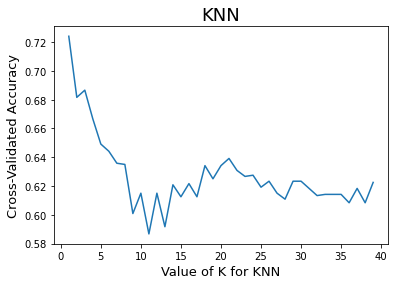

In [24]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN',size=13)
plt.ylabel('Cross-Validated Accuracy',size=13)
plt.title('KNN',size=18)
plt.show()

## Inference:
>So we can clearly see that for least k-value the accuracy score is high, as we increase the k-value the accuracy is being decreased. So the best possible k-value is '1'

## Building the Model

In [25]:
num_folds=40
k_fold=KFold(n_splits=num_folds)

In [26]:
model=KNeighborsClassifier(n_neighbors=1) #As we have for best estimator 1 we have highest accuracy score
results=cross_val_score(model,x,y,cv=k_fold)

In [27]:
results

array([0.33333333, 1.        , 0.83333333, 0.5       , 0.66666667,
       1.        , 0.66666667, 0.66666667, 0.83333333, 0.66666667,
       0.66666667, 1.        , 1.        , 0.66666667, 0.8       ,
       0.6       , 0.4       , 0.8       , 0.6       , 0.8       ,
       1.        , 0.8       , 0.2       , 0.8       , 0.6       ,
       0.6       , 0.        , 0.4       , 0.2       , 0.4       ,
       1.        , 0.6       , 1.        , 0.2       , 0.2       ,
       0.8       , 1.        , 0.8       , 1.        , 1.        ])

In [28]:
 #Average of all the scores
results.mean()

0.6775

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y , train_size=0.8,random_state=0)

In [30]:
x_train.shape,y_train.shape

((171, 9), (171,))

In [31]:
x_test.shape, y_test.shape

((43, 9), (43,))

In [32]:
#predicting
model.fit(x_train,y_train)
y_pred_test=model.predict(x_test)
y_pred_test

array([7, 1, 1, 6, 5, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 7, 1, 1, 3, 3, 5, 2,
       7, 7, 1, 1, 7, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 7, 2, 7, 2],
      dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score( y_test,y_pred_test)

0.627906976744186


>Creating a column of test data and Appending the predicted y values to the y test data column

In [34]:
test_data=pd.DataFrame(y_test)
test_data

,Type
197,7
37,1
89,2
176,6
170,5
75,2
96,2
137,2
5,1
83,2


In [35]:
test_data['y_predicted']=y_pred_test
test_data

,Type,y_predicted
197,7,7
37,1,1
89,2,1
176,6,6
170,5,5
75,2,2
96,2,1
137,2,2
5,1,2
83,2,2


## Inference:
* So from the all observations we can observe that there are some misclassifications done by my model.
* And the accuracy score is 62%

In [36]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

x,y

num_trees = 100
seed=7
kfold = KFold(n_splits=90)
model = AdaBoostClassifier(n_estimators=num_trees,random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.42777777777777776


In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
kfold = KFold(n_splits=20)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=100)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.40545454545454546


## Inference:
  Therefore we got from Grid Search CV 
   * The Best K-Nearest Neihgbour/Best Estimator = 1
   * With the best score 72%

# THE END!